# Problem

## Problem Statement:
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
  - If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

  - If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

## Objective:
 Aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

## Constraints:
When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:
    - **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)
    - **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    - **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

2. **Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

  







In [774]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore') # to ignore the warnings

In [775]:
# Read data Dictionary FIle
data_dictionary_file = 'Data_Dictionary.xlsx'

In [776]:
data_dictionary_file

'Data_Dictionary.xlsx'

In [777]:
# Read the xlsx file into a Pandas DataFrame
df = pd.read_excel(data_dictionary_file)

In [778]:
print(df.head())

            LoanStatNew                                        Description
0        acc_now_delinq  The number of accounts on which the borrower i...
1  acc_open_past_24mths         Number of trades opened in past 24 months.
2            addr_state  The state provided by the borrower in the loan...
3              all_util              Balance to credit limit on all trades
4            annual_inc  The self-reported annual income provided by th...


In [779]:
df.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [780]:
df

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


In [781]:
# now read the loan csv file
loan_csv_file_path = 'loan.csv'

In [782]:
df = pd.read_csv(loan_csv_file_path)

# 1. Data Cleaning


### 1.1 To Check if there is any headers / footers or summary details rows are there and delete it

In [783]:
df.shape

(39717, 111)

In [784]:
df.head() # summary about the loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


- From the above analysis can say that there is no footers, Total, SubTotal Row as well

In [785]:
# to check if there is unnessary rows or not
df['loan_status'].value_counts()

,count
loan_status,
Fully Paid,32950
Charged Off,5627
Current,1140


In [786]:
# dropping the rows for loan_status == "Current" as the loan currently in progress and cannot contribute to conclusive
df = df[df['loan_status'] != 'Current']

In [787]:
print("Total Number of rows now:", len(df)) # total number of the row now

Total Number of rows now: 38577


### 1.2 Delete the Uneccessary Columns

In [788]:
columns_with_all_missing_or_NA = df.columns[df.isna().all()]

In [789]:
# Print the columns with all missing values
print(columns_with_all_missing_or_NA)

Index(['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
     

In [790]:
len(columns_with_all_missing_or_NA)

55

In [791]:
# deleting the columns which is having all rows valus as na
df = df.dropna(axis = 1, how = 'all')

In [792]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [793]:
#still can observe some columns with 0.0 or NAN.Lets remove them also
# Find columns with values equal to 0.0 or NaN
columns_with_zeros_or_nan_only = df.columns[(df == 0.0).all() | df.isna().all()]

In [794]:
print(columns_with_zeros_or_nan_only)

Index(['out_prncp', 'out_prncp_inv', 'acc_now_delinq', 'delinq_amnt'], dtype='object')


In [795]:
# lets delete all the columns which value is unique in nature
unique_columns = [col for col in df.columns if df[col].nunique() == len(df)]

In [796]:
unique_columns

['id', 'member_id', 'url']

In [797]:
# delete 'member_id' and 'url' as it does not count in EDA
df.drop(['url', 'member_id'], axis = 1, inplace = True)

In [798]:
df.shape

(38577, 54)

In [799]:
# delete the columns which is having text / desciption values as they don't donctribute to EDA
df.drop(columns= ['desc', 'title'], inplace = True)

In [800]:
df.shape

(38577, 52)

In [801]:
# limit our analysis till group level only, hence deleting the subgroups
df = df.drop(['sub_grade'], axis = 1)

In [802]:
# behavioural data is captured post loan approval and will not be avalilable during the loan approval process. hence removing these fields
behavioural_cols=['delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                          'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp',
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                        'application_type','last_pymnt_d','last_credit_pull_d']

In [803]:
df = df.drop(behavioural_cols, axis = 1)

In [804]:
df.nunique().sort_values()

,0
tax_liens,1
delinq_amnt,1
chargeoff_within_12_mths,1
acc_now_delinq,1
policy_code,1
collections_12_mths_ex_med,1
initial_list_status,1
pymnt_plan,1
loan_status,2
term,2


In [805]:
# example most of the columns values is 1. deleting them as well
for columns in df.columns:
    if df[columns].nunique(dropna = True) == 1:
        print(columns)

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens


In [806]:
df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,mths_since_last_delinq,mths_since_last_record,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,NaN,10+ years,...,NaN,NaN,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,...,NaN,NaN,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,NaN,10+ years,...,NaN,NaN,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,...,35.0,NaN,f,0.0,1,0,0.0,0,0.0,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,Veolia Transportaton,3 years,...,NaN,NaN,f,0.0,1,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,FiSite Research,4 years,...,0.0,0.0,f,NaN,1,0,NaN,0,NaN,NaN
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,"Squarewave Solutions, Ltd.",3 years,...,5.0,0.0,f,NaN,1,0,NaN,0,NaN,NaN
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,NaN,< 1 year,...,0.0,0.0,f,NaN,1,0,NaN,0,NaN,NaN
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,NaN,< 1 year,...,0.0,0.0,f,NaN,1,0,NaN,0,NaN,NaN


In [807]:
# dropping the columns which is having more than 50 % of value is null
total_rows = len(df)
for columns in df.columns:
  if df[columns].isna().mean().round(2) >= 0.50:
    print(columns)
    df.drop(columns, axis = 1, inplace = True)

mths_since_last_delinq
mths_since_last_record


In [808]:
df.shape

(38577, 28)

In [809]:
# deleting emp_title as its desciptions or textual information and doesn't participate in EDA
df = df.drop(['emp_title'], axis = 1)

In [810]:
df.shape

(38577, 27)

In [811]:
df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,RENT,...,AZ,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,RENT,...,GA,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,RENT,...,IL,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,RENT,...,CA,20.00,f,0.0,1,0,0.0,0,0.0,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,3 years,RENT,...,AZ,11.20,f,0.0,1,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,4 years,MORTGAGE,...,CO,11.33,f,NaN,1,0,NaN,0,NaN,NaN
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,3 years,RENT,...,NC,6.40,f,NaN,1,0,NaN,0,NaN,NaN
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,< 1 year,MORTGAGE,...,MA,2.30,f,NaN,1,0,NaN,0,NaN,NaN
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,< 1 year,MORTGAGE,...,MD,3.72,f,NaN,1,0,NaN,0,NaN,NaN


In [812]:
# Removing trailing whitespaces and tab characters from column names before dropping
columns_to_drop = ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']

# Remove any leading/trailing whitespaces or tabs from column names in columns_to_drop
cleaned_columns_to_drop = [col.strip() for col in columns_to_drop]

# Ensure columns exist before dropping, using a list comprehension
existing_columns_to_drop = [col for col in cleaned_columns_to_drop if col in df.columns]

# Drop only the columns that exist
df = df.drop(columns=existing_columns_to_drop, axis=1)

# 2 Data Conversion

In [813]:
df.dtypes

,0
id,int64
loan_amnt,int64
funded_amnt,int64
funded_amnt_inv,float64
term,object
int_rate,object
installment,float64
grade,object
emp_length,object
home_ownership,object


In [814]:
df['term'].value_counts()

,count
term,
36 months,29096
60 months,9481


In [815]:
# convert term from string to int if it's not already an int
def clean_term(term):
  if isinstance(term, str):  # Check if term is a string
    return int(term.strip().split()[0])
  return term  # If it's already an int, return as is

df['term'] = df['term'].apply(clean_term)

In [816]:
df['term'].dtypes

dtype('int64')

In [817]:
df['term'].value_counts()

,count
term,
36,29096
60,9481


In [818]:
df['int_rate'].value_counts()

,count
int_rate,
10.99%,913
11.49%,790
7.51%,787
13.49%,749
7.88%,725
...,...
16.96%,1
18.36%,1
16.15%,1


In [819]:
# convert int rate fromns trying to float
df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float)

In [820]:
df['int_rate'].value_counts()

,count
int_rate,
10.99,913
11.49,790
7.51,787
13.49,749
7.88,725
...,...
16.96,1
18.36,1
16.15,1


In [821]:
# convert the column loan_funded_amnt and funded_amnt as float64
df = df.astype({'loan_amnt': 'float64', 'funded_amnt': 'float64'})

In [822]:
df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500.0,2500.0,1075.0,36,8.07,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,NaN
39713,90665,8500.0,8500.0,875.0,36,10.28,275.38,C,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,NaN
39714,90395,5000.0,5000.0,1325.0,36,8.07,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,NaN
39715,90376,5000.0,5000.0,650.0,36,7.43,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,NaN


In [823]:
# check grade datatypes
df['grade'].value_counts()

,count
grade,
B,11675
A,10045
C,7834
D,5085
E,2663
F,976
G,299


In [824]:
df['emp_length'].value_counts()

,count
emp_length,
10+ years,8488
< 1 year,4508
2 years,4291
3 years,4012
4 years,3342
5 years,3194
1 year,3169
6 years,2168
7 years,1711


In [825]:
# rounding off the belows to two decimals points
for c in ['loan_amnt', 'funded_amnt', 'int_rate', 'funded_amnt_inv']:  # Removed 'dti' from the list
    if c in df.columns:  # Check if the column exists before processing
        df[c] = df[c].apply(lambda x: round(x, 2))
        print(df[c])
    else:
        print(f"Column '{c}' not found in DataFrame.")

0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: loan_amnt, Length: 38577, dtype: float64
0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: funded_amnt, Length: 38577, dtype: float64
0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64
0         4975.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     1075.0
39713      875.0
39714     1325.0
39715      650.0
39716      800.0
Name: funded_amnt_inv, Length: 38577, dtype: float64


In [826]:
#converting issue_d`to date type
df['issue_d'] = pd.to_datetime(df.issue_d, format='%b-%y')
df['issue_d']

,issue_d
0,2011-12-01
1,2011-12-01
2,2011-12-01
3,2011-12-01
5,2011-12-01
...,...
39712,2007-07-01
39713,2007-07-01
39714,2007-07-01
39715,2007-07-01


In [827]:
(df.isnull().sum()*100)/len(df)

,0
id,0.000000
loan_amnt,0.000000
funded_amnt,0.000000
funded_amnt_inv,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
emp_length,2.677761
home_ownership,0.000000


# 3. Dropping/ Imputing the rows

In [828]:
# Dropping the null rows for emp_length and pub_rec_bankruptcies columns as number of null rows are very less.
prev_rows=len(df)

In [829]:
prev_rows

38577

In [830]:
df= df[df['emp_length'].notna()]
df= df[df['pub_rec_bankruptcies'].notna()]

In [831]:
after_rows=len(df)

In [832]:
total_deleted=((prev_rows-after_rows)*100)/prev_rows

In [833]:
print("Total % of rows deleted:",round(total_deleted,2))

Total % of rows deleted: 4.48


In [834]:
print(df.shape)

(36847, 19)


In [835]:
(df.isnull().sum()*100)/len(df)

,0
id,0.0
loan_amnt,0.0
funded_amnt,0.0
funded_amnt_inv,0.0
term,0.0
int_rate,0.0
installment,0.0
grade,0.0
emp_length,0.0
home_ownership,0.0


In [836]:
def strip_emp_length(X):
  X = X.strip("years")
  X = X.strip("year")
  X = X.replace(" ", "")
  X = X.replace("+", "")
  return X

In [837]:
df['emp_length'] = df['emp_length'].apply(lambda x: strip_emp_length(x))

In [838]:
print(df['emp_length'])

0        10
1        <1
2        10
3        10
5         3
         ..
39562     1
39573     3
39623     8
39666     2
39680     2
Name: emp_length, Length: 36847, dtype: object


# 4. Derived Columns

In [839]:
# Creating a dervied columns for issue month and issue year from issues date
df['issue_year']=pd.DatetimeIndex(df['issue_d']).year
df['issue_month']=pd.DatetimeIndex(df['issue_d']).month

In [840]:
print(df.shape)

(36847, 21)


In [841]:
print(df["loan_amnt"].describe())

count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


<Axes: >

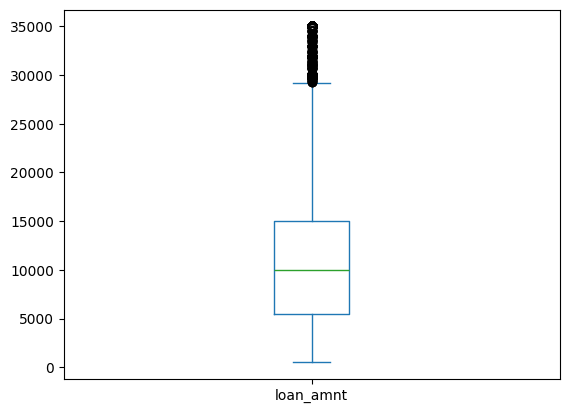

In [842]:
df['loan_amnt'].plot(kind='box')

# Exploratory Data Analysis

## (a). Univariate Analysis


In [843]:
# Column metadata used by functions below
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annuap Income',
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}

In [844]:
# Bucketing Diffrent Variable For Better Analysis

In [845]:
# 1. Bucketing loan amount
def bucket_loan_amnt(columns):
  if columns <= 5000:
    return '0 - 5k'
  elif (columns > 5000) and (columns <= 10000):
    return '5k - 10k'
  elif (columns > 10000) and (columns <= 15000):
    return '10k - 15k'
  else:
    return '15k - above'

In [846]:
df['loan_amnt_b'] = df.apply(lambda x: bucket_loan_amnt(x['loan_amnt']), axis = 1)

In [847]:
# 2. Bucketing Annual Income
def bucket_annual_inc(columns):
  if columns <= 40000:
    return '0 - 40k'
  elif (columns > 40000) and (columns <= 50000):
    return '40k - 50k'
  elif (columns > 50000) and (columns <= 60000):
    return '50k - 60k'
  elif (columns > 60000) and (columns <= 70000):
    return '60k - 70k'
  elif (columns > 70000) and (columns <= 80000):
    return '70k - 80k'
  else:
    return '80k - above'

In [848]:
df['annual_inc_b'] = df.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

In [849]:
# 3. Bucketing interest rate
def bucket_int_rate(columns):
  if columns <= 9:
    return 'Very Low'
  elif (columns > 9) and (columns <= 12):
    return 'Low'
  elif (columns > 11) and (columns <= 13):
    return 'Moderate'
  elif (columns > 13) and (columns <= 15):
    return 'High'
  else:
    return 'Very High'

In [850]:
df['int_rate_b'] = df.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)

In [851]:
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile

In [852]:
loan_df['dti_b'] = loan_df.apply(lambda x : bucket_dti(x.dti), axis = 1)

In [853]:
# Univarients function
def plot_digram(df, column):
    fig, p = plot.subplots(1,2, figsize=(16, 4))
    sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sea.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plot.tight_layout()
    plot.show()

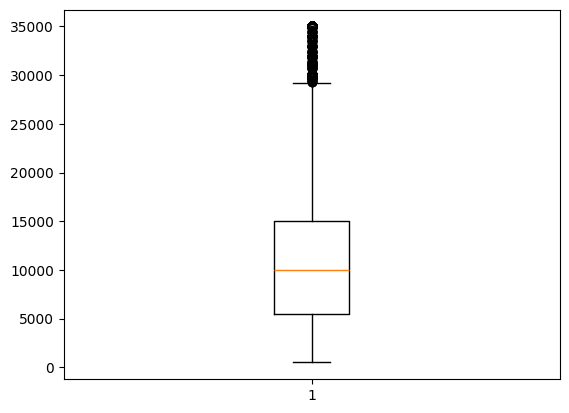

In [854]:
plot.boxplot(df['loan_amnt'],)
plot.show()

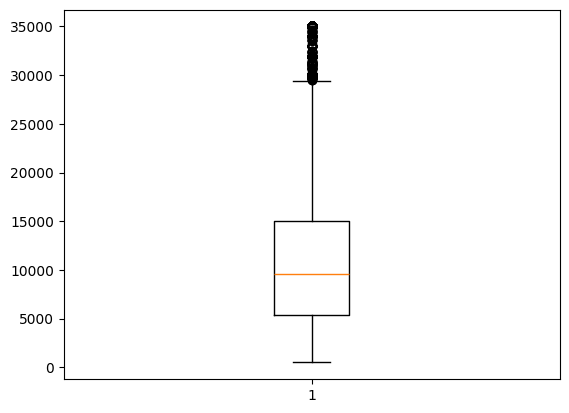

In [855]:
plot.boxplot(df['funded_amnt'])
plot.show()

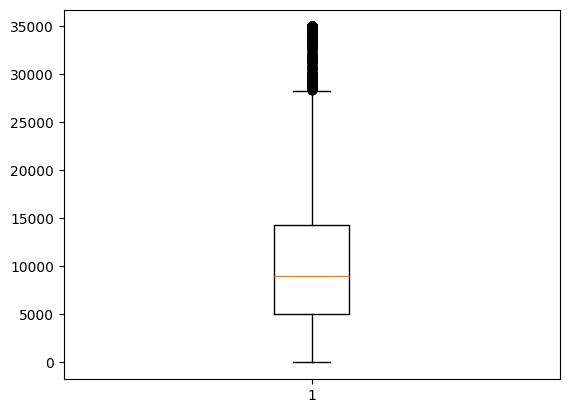

In [856]:
plot.boxplot(df['funded_amnt_inv'])
plot.show()

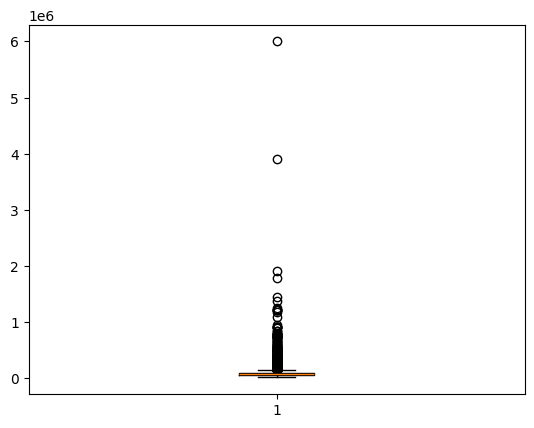

In [857]:
plot.boxplot(df['annual_inc'])
plot.show()

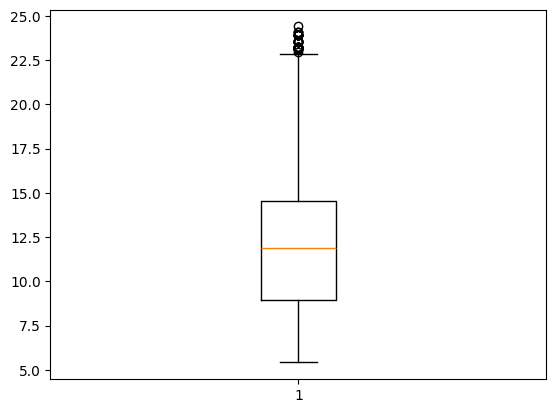

In [858]:
plot.boxplot(df['int_rate'])
plot.show()

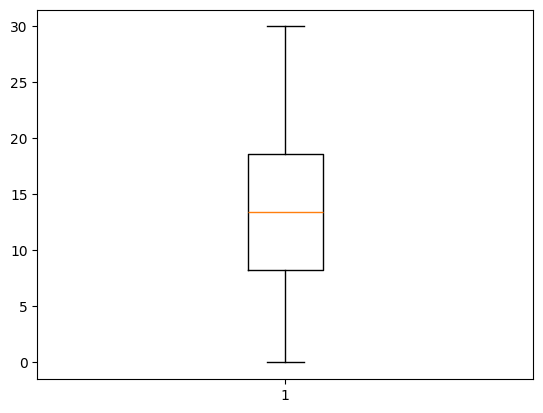

In [859]:
plot.boxplot(df['dti'])
plot.show()

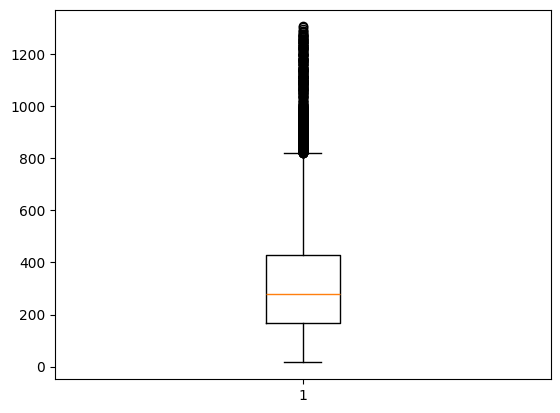

In [860]:
plot.boxplot(df['installment'])
plot.show()

In [861]:
# From above box plts we can see there is otliers exits for columns'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc'.
# Lets remove the outlier
outliers_columns_set1= ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']
outliers_columns_set2=['int_rate', 'installment', 'annual_inc']
# Define a function to remove outliers based on IQR
def remove_outliers_iqr(data, columns,threshold):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

In [862]:
# Remove outliers from the DataFrame
df = remove_outliers_iqr(df, outliers_columns_set1,1.5)
df = remove_outliers_iqr(df, outliers_columns_set2,1.5)

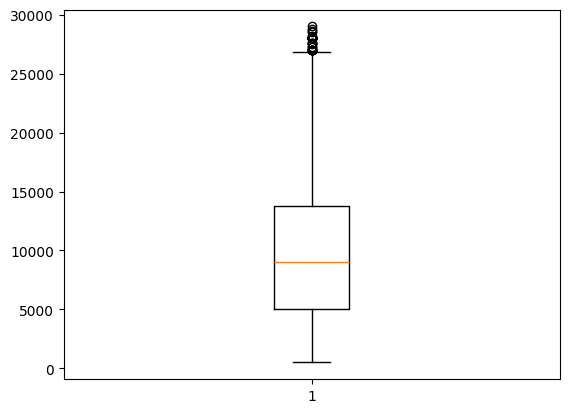

In [863]:
plot.boxplot(df['loan_amnt'])
plot.show()

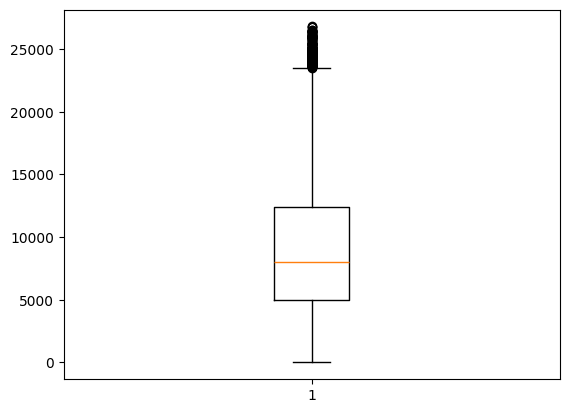

In [864]:
plot.boxplot(df['funded_amnt_inv'])
plot.show()

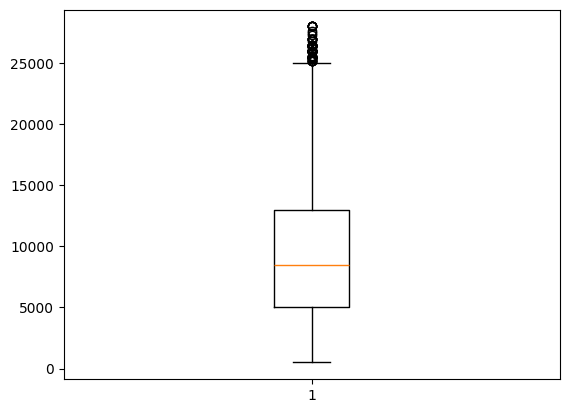

In [865]:
plot.boxplot(df['funded_amnt'])
plot.show()

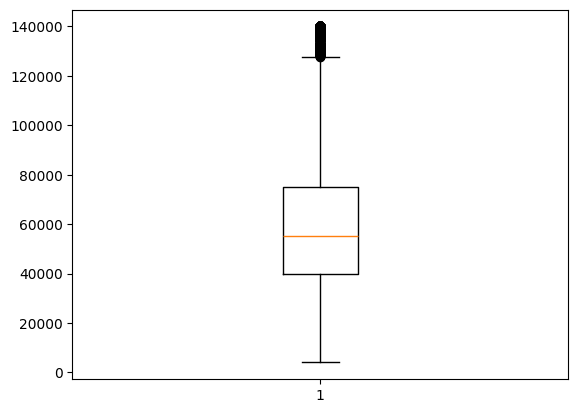

In [866]:
plot.boxplot(df['annual_inc'])
plot.show()

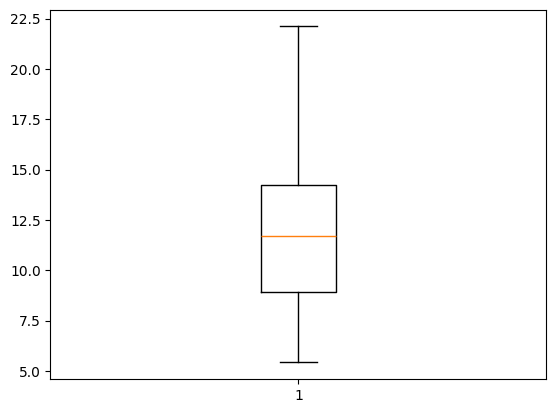

In [867]:
plot.boxplot(df['int_rate'])
plot.show()

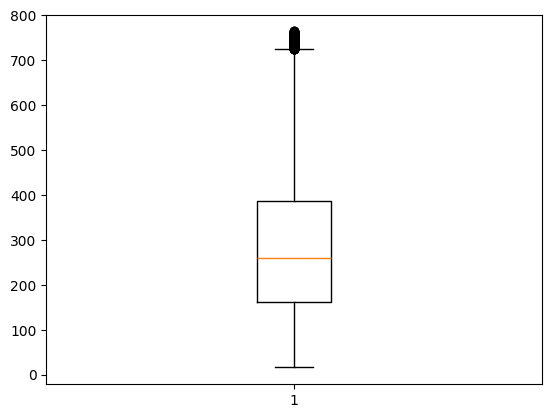

In [868]:
plot.boxplot(df['installment'])
plot.show()

In [869]:
df.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,issue_d,dti,pub_rec_bankruptcies,issue_year,issue_month
count,3.319100e+04,33191.000000,33191.000000,33191.000000,33191.000000,33191.000000,33191.000000,33191.000000,33191,33191.000000,33191.000000,33191.000000,33191.000000
mean,6.788514e+05,9820.838480,9593.825887,9210.186390,41.753608,11.782783,286.456292,59883.284700,2010-11-04 09:27:36.557500416,13.463454,0.043837,2010.333434,7.131361
min,5.574200e+04,500.000000,500.000000,0.000000,36.000000,5.420000,16.080000,4000.000000,2007-08-01 00:00:00,0.000000,0.000000,2007.000000,1.000000
25%,5.160495e+05,5000.000000,5000.000000,5000.000000,36.000000,8.900000,161.130000,40000.000000,2010-05-01 00:00:00,8.360000,0.000000,2010.000000,4.000000
50%,6.525940e+05,9000.000000,8500.000000,8000.000000,36.000000,11.710000,260.480000,55000.000000,2011-01-01 00:00:00,13.570000,0.000000,2011.000000,7.000000
75%,8.232120e+05,13750.000000,13000.000000,12409.045000,36.000000,14.260000,386.390000,75000.000000,2011-07-01 00:00:00,18.730000,0.000000,2011.000000,10.000000
max,1.077501e+06,29000.000000,28000.000000,26800.000000,60.000000,22.110000,763.830000,140000.000000,2011-12-01 00:00:00,29.990000,2.000000,2011.000000,12.000000
std,2.008328e+05,5809.600807,5565.574327,5511.942478,10.246255,3.591944,161.010324,26916.857415,NaN,6.651684,0.205470,0.820550,3.380960


<Axes: xlabel='annual_inc'>

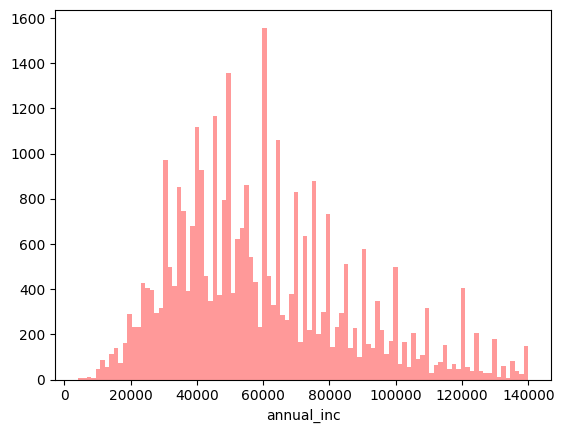

In [870]:
sns.distplot(df['annual_inc'], kde=False, color='red', bins=100)

In [871]:
df['annual_inc'].describe()

,annual_inc
count,33191.000000
mean,59883.284700
std,26916.857415
min,4000.000000
25%,40000.000000
50%,55000.000000
75%,75000.000000
max,140000.000000


In [872]:
#lets group by loan_status percentage
value_counts = df['loan_status'].value_counts()
total_count = len(df)

In [873]:
# Calculate the percentage for each value
value_percentages = (value_counts / total_count) * 100

In [874]:
value_percentages

,count
loan_status,
Fully Paid,85.797355
Charged Off,14.202645


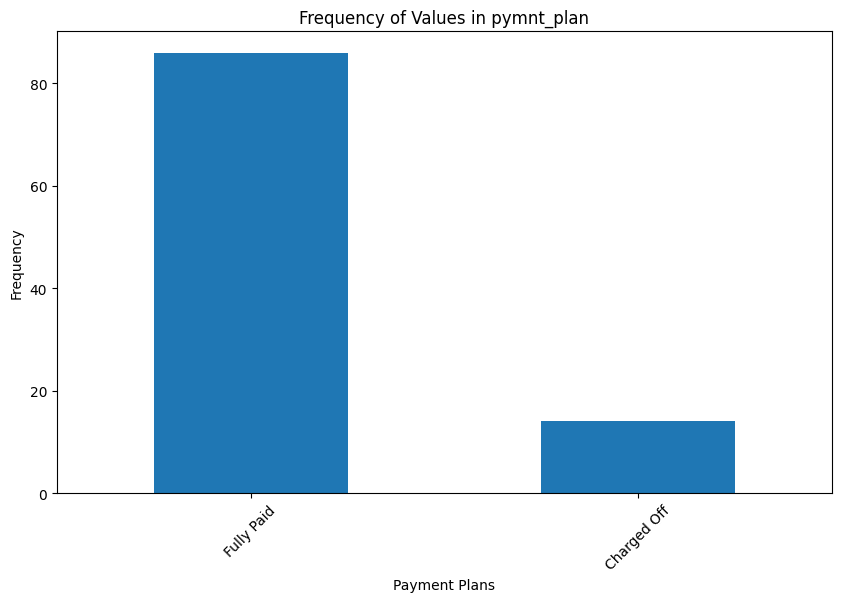

In [875]:
# Create a bar plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
ax = value_percentages.plot(kind='bar')
plt.title('Frequency of Values in pymnt_plan')
plt.xlabel('Payment Plans')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.show()

In [876]:
print(df.dtypes)

id                               int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                             int64
int_rate                       float64
installment                    float64
grade                           object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
pub_rec_bankruptcies           float64
issue_year                       int32
issue_month                      int32
loan_amnt_b                     object
annual_inc_b                    object
int_rate_b                      object
dtype: object


In [877]:
#high debt to income ratio for more than 50% of people
df.dti.describe()

,dti
count,33191.000000
mean,13.463454
std,6.651684
min,0.000000
25%,8.360000
50%,13.570000
75%,18.730000
max,29.990000


In [878]:
value_counts = df['purpose'].value_counts()
total_count = len(df)

In [879]:
# Calculate the percentage for each value
value_percentages = (value_counts / total_count) * 100

In [880]:
value_percentages

,count
purpose,
debt_consolidation,46.946461
credit_card,13.087885
other,10.105149
home_improvement,6.938628
major_purchase,5.766623
car,4.139676
small_business,4.124612
wedding,2.536832
medical,1.822783


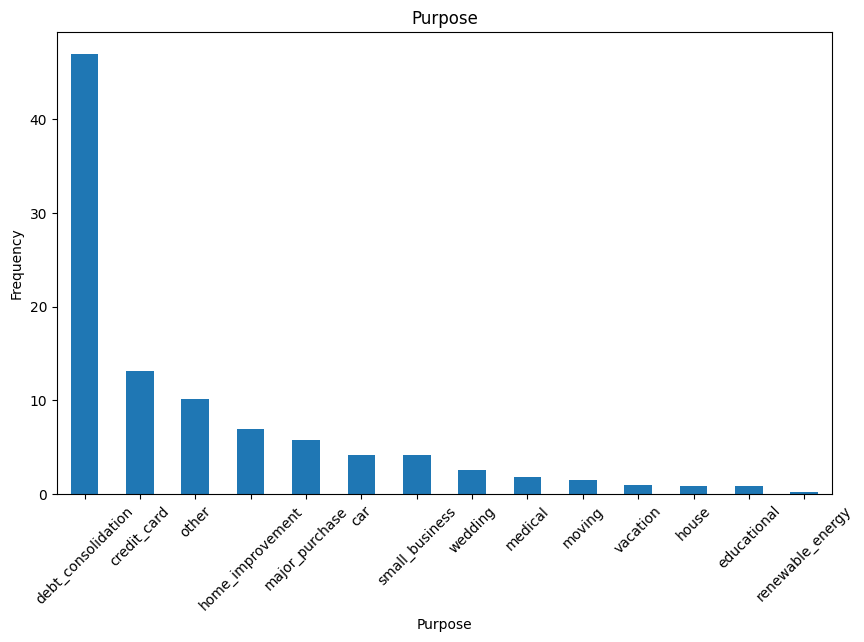

In [881]:
# Create a bar plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
ax = value_percentages.plot(kind='bar')
plt.title('Purpose')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.show()

In [882]:
value_counts = df['term'].value_counts()
total_count = len(df)

In [883]:
# Calculate the percentage for each value
value_percentages = (value_counts / total_count) * 100

In [884]:
value_percentages

,count
term,
36,76.026634
60,23.973366


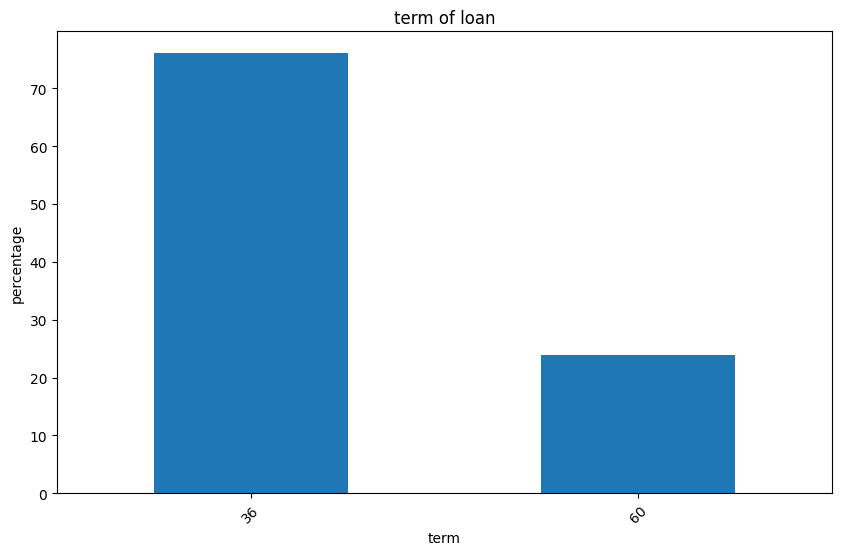

In [885]:
# Create a bar plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
ax = value_percentages.plot(kind='bar')
plt.title('term of loan')
plt.xlabel('term')
plt.ylabel('percentage')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.show()

In [886]:
print(df.dtypes)

id                               int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                             int64
int_rate                       float64
installment                    float64
grade                           object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
pub_rec_bankruptcies           float64
issue_year                       int32
issue_month                      int32
loan_amnt_b                     object
annual_inc_b                    object
int_rate_b                      object
dtype: object


## (b). Bivariate Analysis

In [887]:
#Bivariate Analysis on annual income against Chargedoff_Proportion -
inc_range_vs_loan = loan_df.groupby(['annual_inc_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off']+ inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0 - 40k,1751,7947,9698,0.180553
2,50k - 60k,867,4705,5572,0.155599
1,40k - 50k,862,4829,5691,0.151467
3,60k - 70k,559,3537,4096,0.136475
4,70k - 80k,465,3060,3525,0.131915
5,80k - above,1123,8872,9995,0.112356


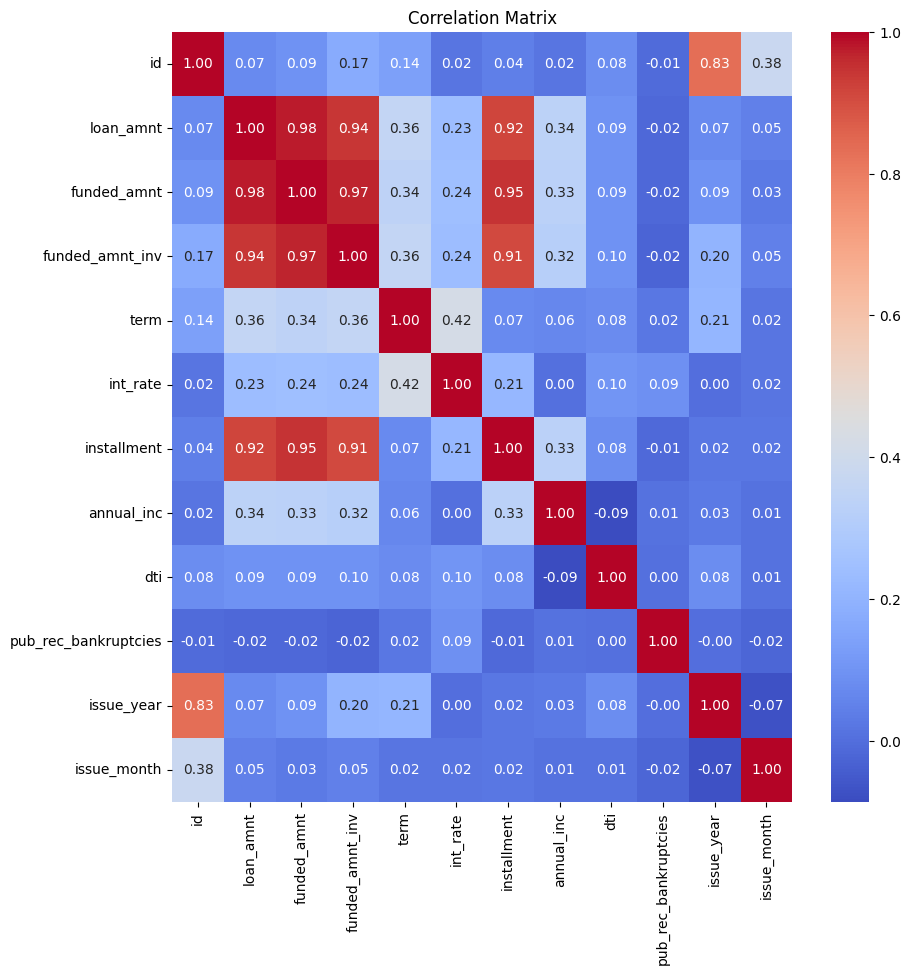

In [888]:
#Lets Do Bivariate analysis now
numeric_columns = df.select_dtypes(include=['number'])
# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [889]:
charged_off_df = df[df['loan_status'] == 'Charged Off']
# Count the "charged_off" loans for each purpose of the loan
charge_off_counts = charged_off_df['purpose'].value_counts()
charge_off_counts

,count
purpose,
debt_consolidation,2329
other,531
credit_card,450
small_business,366
home_improvement,277
major_purchase,195
car,150
medical,95
wedding,82


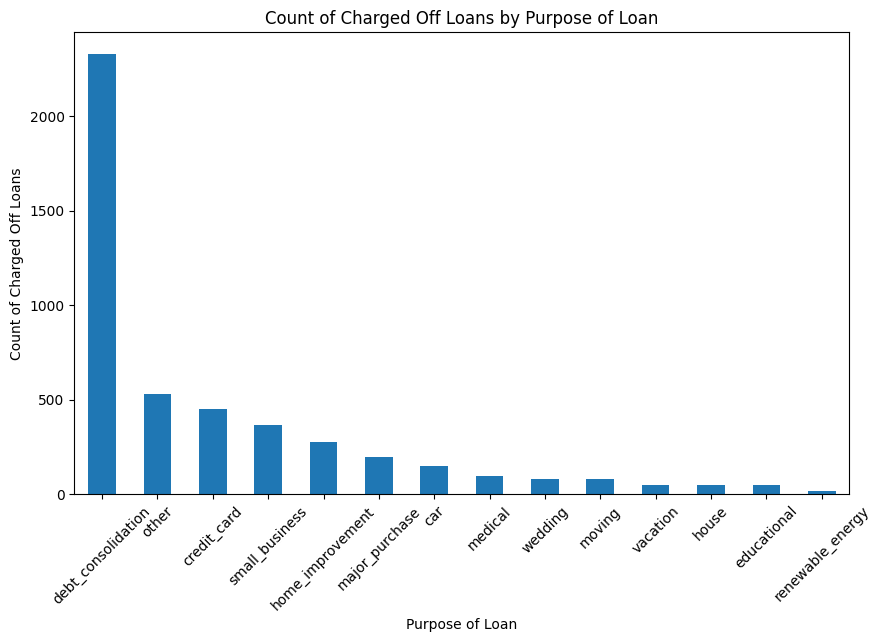

In [890]:
# Create a bar plot
plt.figure(figsize=(10, 6))
charge_off_counts.plot(kind='bar')
plt.xlabel('Purpose of Loan')
plt.ylabel('Count of Charged Off Loans')
plt.title('Count of Charged Off Loans by Purpose of Loan')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.show()

## (c). Segmented Univariate Analysis

In [891]:
charged_off_df = df[df['loan_status'] == 'Charged Off']
charged_off_df.annual_inc.describe()

,annual_inc
count,4714.000000
mean,54836.914552
std,25207.835269
min,4080.000000
25%,36000.000000
50%,50000.000000
75%,68835.250000
max,140000.000000


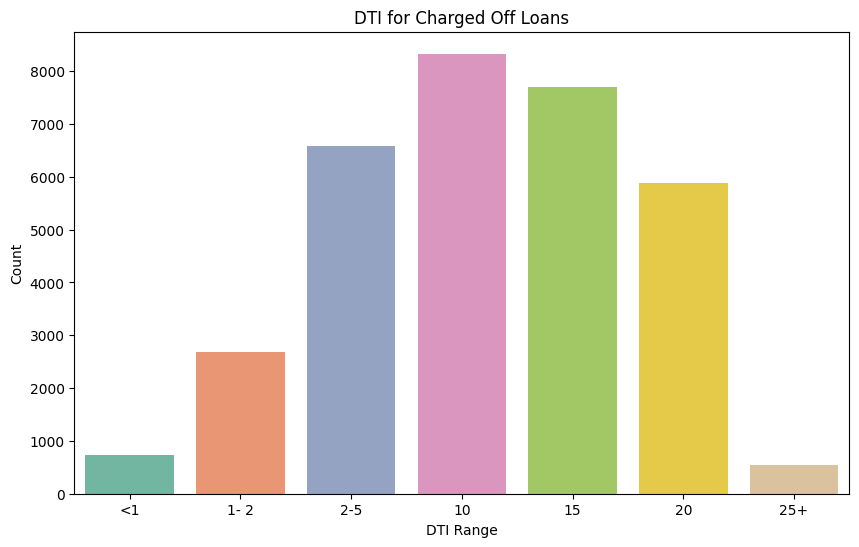

In [892]:
#segmentd analysis for dti vs charged off loans
dti_bins = [ 1,2,5, 10, 15, 20,25,30]
labels = ['<1','1- 2','2-5', '10', '15','20','25+']

# Categorize salaries into bins and count the frequency of each bin for charged-off loans
df['dti'] = pd.cut(df['dti'], bins=dti_bins, labels=labels)

# Create a bar plot of salary ranges for charged-off loans
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='dti', order=labels, palette='Set2')
plt.xlabel('DTI Range')
plt.ylabel('Count')
plt.title('DTI for Charged Off Loans')
plt.show()

In [893]:
df.verification_status.head()

charged_off_df4 = df[df['loan_status'] == 'Charged Off']
charged_off_df4.verification_status.describe()

,verification_status
count,4714
unique,3
top,Not Verified
freq,1864


In [894]:
# Count the "charged_off" loans for each purpose of the loan
charge_off_counts4 = charged_off_df['verification_status'].value_counts()

In [895]:
charge_off_counts4

,count
verification_status,
Not Verified,1864
Verified,1566
Source Verified,1284


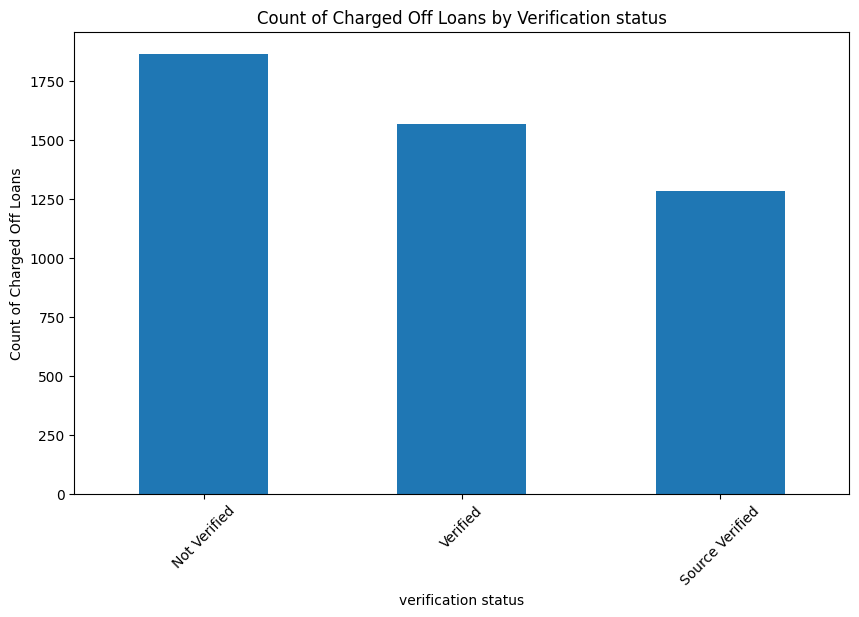

In [896]:
# Create a bar plot
plt.figure(figsize=(10, 6))
charge_off_counts4.plot(kind='bar')
plt.xlabel('verification status')
plt.ylabel('Count of Charged Off Loans')
plt.title('Count of Charged Off Loans by Verification status')
plt.xticks(rotation=45)
plt.show()

#if verification is not done there is more chance of charge off loans

In [897]:
charged_off_df = df[df['loan_status'] == 'Charged Off']
charged_off_df.home_ownership.describe()

,home_ownership
count,4714
unique,4
top,RENT
freq,2488


In [898]:
# Count the "charged_off" loans for each home ownershup
charge_off_counts = charged_off_df['home_ownership'].value_counts()

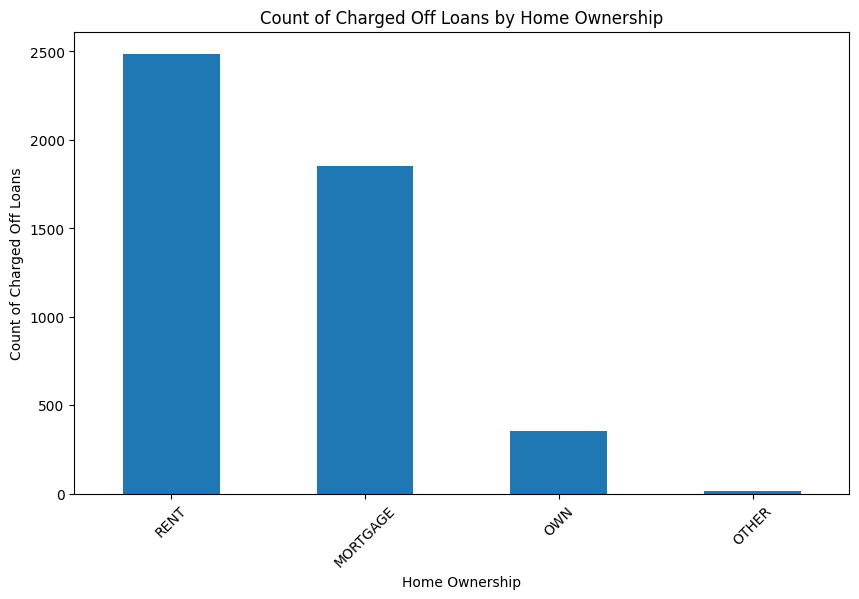

In [899]:
# Create a bar plot
plt.figure(figsize=(10, 6))
charge_off_counts.plot(kind='bar')
plt.xlabel('Home Ownership')
plt.ylabel('Count of Charged Off Loans')
plt.title('Count of Charged Off Loans by Home Ownership')
plt.xticks(rotation=45)
plt.show()

In [900]:
charged_off_df = df[df['loan_status'] == 'Charged Off']
charged_off_df.grade.describe()

,grade
count,4714
unique,7
top,B
freq,1225


In [901]:
# Count the "charged_off" loans for Grades by LC
charge_off_counts = charged_off_df['grade'].value_counts()

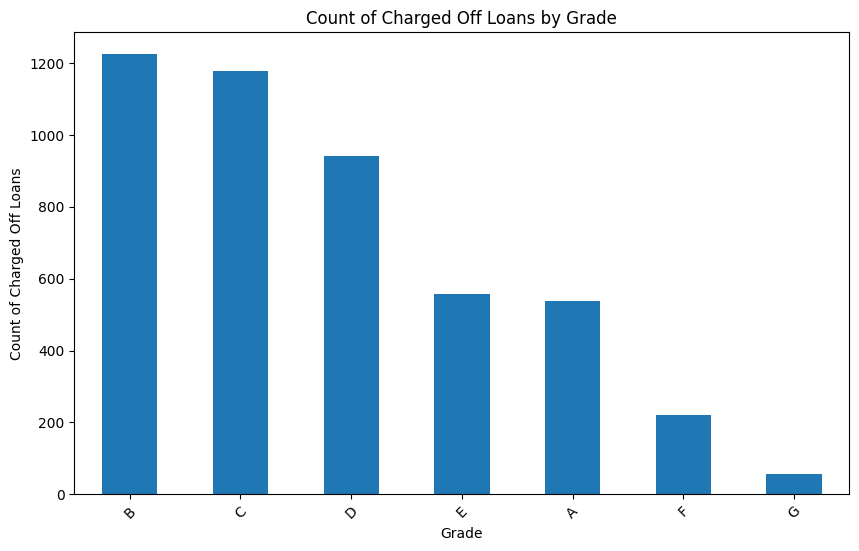

In [902]:
# Create a bar plot
plt.figure(figsize=(10, 6))
charge_off_counts.plot(kind='bar')
plt.xlabel('Grade')
plt.ylabel('Count of Charged Off Loans')
plt.title('Count of Charged Off Loans by Grade')
plt.xticks(rotation=45)
plt.show()

In [903]:
addr_state_vs_loan = loan_df.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan['Total'] = addr_state_vs_loan['Charged Off']+ addr_state_vs_loan['Fully Paid']
addr_state_vs_loan['Chargedoff_Proportion'] = addr_state_vs_loan['Charged Off'] / addr_state_vs_loan['Total']
addr_state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,addr_state,Charged Off,Fully Paid,Total,Chargedoff_Proportion
28,NE,3.0,2.0,5.0,0.600000
32,NV,108.0,371.0,479.0,0.225470
40,SD,12.0,50.0,62.0,0.193548
0,AK,15.0,63.0,78.0,0.192308
9,FL,504.0,2277.0,2781.0,0.181230
24,MO,114.0,556.0,670.0,0.170149
11,HI,28.0,138.0,166.0,0.168675
13,ID,1.0,5.0,6.0,0.166667
31,NM,30.0,153.0,183.0,0.163934
36,OR,71.0,364.0,435.0,0.163218


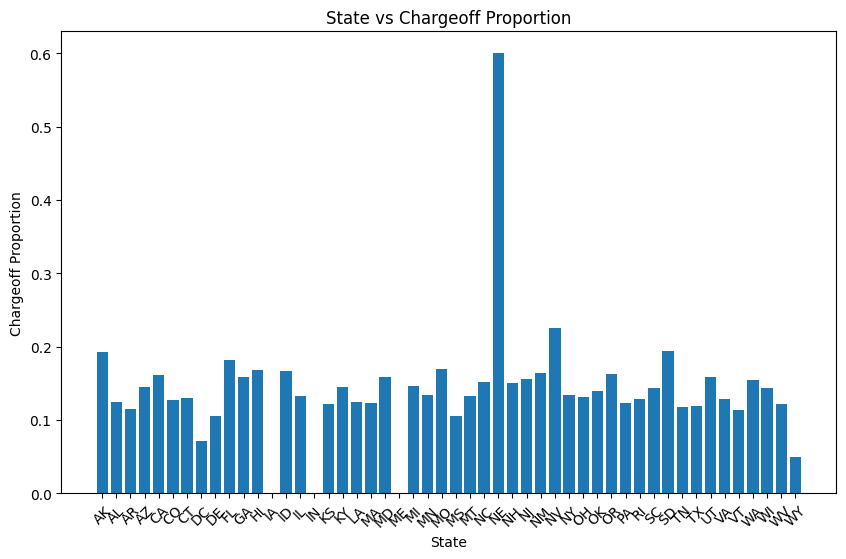

In [904]:
# Create a bar plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(x = 'addr_state', height = 'Chargedoff_Proportion', data = addr_state_vs_loan)
#plt.barplot(x = 'addr_state', y = 'Chargedoff_Proportion', data = addr_state_vs_loan)
#charge_off_counts.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Chargeoff Proportion')
plt.title('State vs Chargeoff Proportion')
plt.xticks(rotation=45)
plt.show()

In [905]:
inc_range_vs_loan = loan_df.groupby(['annual_inc_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off']+ inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0 - 40k,1751,7947,9698,0.180553
2,50k - 60k,867,4705,5572,0.155599
1,40k - 50k,862,4829,5691,0.151467
3,60k - 70k,559,3537,4096,0.136475
4,70k - 80k,465,3060,3525,0.131915
5,80k - above,1123,8872,9995,0.112356


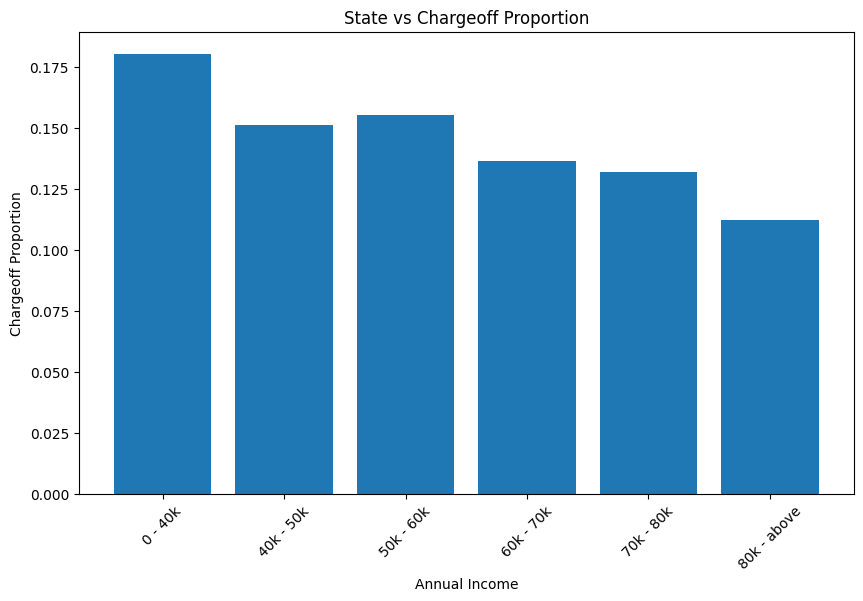

In [908]:
# Create a bar plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(x = 'annual_inc_b', height = 'Chargedoff_Proportion', data = inc_range_vs_loan)
#plt.barplot(x = 'addr_state', y = 'Chargedoff_Proportion', data = addr_state_vs_loan)
#charge_off_counts.plot(kind='bar')
plt.xlabel('Annual Income')
plt.ylabel('Chargeoff Proportion')
plt.title('State vs Chargeoff Proportion')
plt.xticks(rotation=45)
plt.show()

In [910]:
loan_df['pub_rec_bankruptcies'].value_counts()

,count
pub_rec_bankruptcies,
0.0,36238
1.0,1637
2.0,5


In [911]:
pub_rec_bankruptcies_vs_loan = loan_df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_vs_loan['Total'] = pub_rec_bankruptcies_vs_loan['Charged Off']+ pub_rec_bankruptcies_vs_loan['Fully Paid']
pub_rec_bankruptcies_vs_loan['Chargedoff_Proportion'] = pub_rec_bankruptcies_vs_loan['Charged Off'] / pub_rec_bankruptcies_vs_loan['Total']
pub_rec_bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,2.0,2,3,5,0.400000
1,1.0,366,1271,1637,0.223580
0,0.0,5141,31097,36238,0.141868


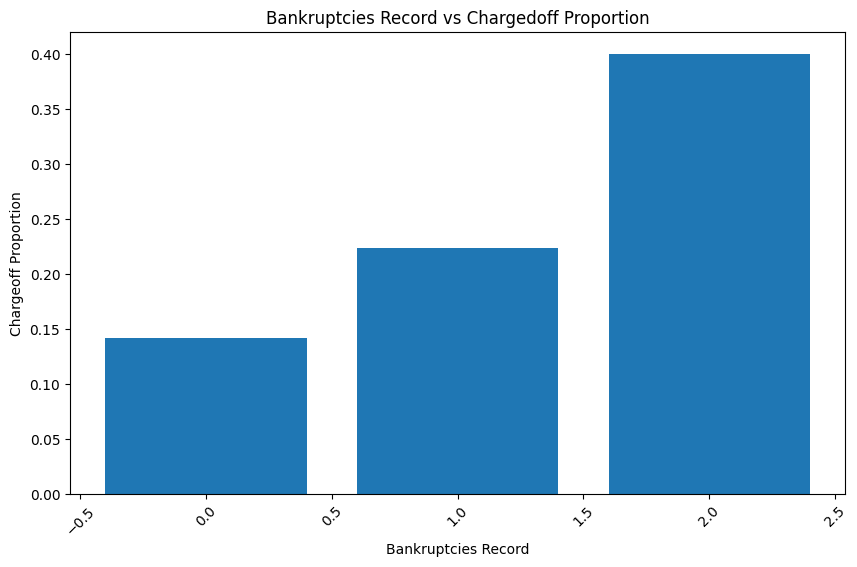

In [912]:
# Create a bar plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(x = 'pub_rec_bankruptcies', height = 'Chargedoff_Proportion', data = pub_rec_bankruptcies_vs_loan)
#plt.barplot(x = 'addr_state', y = 'Chargedoff_Proportion', data = addr_state_vs_loan)
#charge_off_counts.plot(kind='bar')
plt.xlabel('Bankruptcies Record')
plt.ylabel('Chargeoff Proportion')
plt.title('Bankruptcies Record vs Chargedoff Proportion')
plt.xticks(rotation=45)
plt.show()